<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/randwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Graphs**

* Distribution of random graphs


In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [2]:
from fdmtools import *
import random
import matplotlib.colors as mcolors
import seaborn as sns
from glob import glob
plt.rcParams['figure.dpi'] = 120

* Lets verify sample value of real u(x,y) against approximated value.
* The exact solution of our Poisson equation
  is $u(x,y) = e^{x + \frac{y}{2}$.
* So we can check if our algorithm works.

In [5]:
num_walks = 3000
num_buckets = 30
a = 0
b = 4
c = 4
s0 = 0
N = 100
dt = (b-a)/N
z = 4.0

def random_walk():
    S = []
    s = s0
    R = 2 * np.random.rand(N+1) - 1
    #R = np.random.normal(loc=0, scale=1.0, size=N+1)
    for i in range(N+1):
        #ds = s * R[i] * dt
        ds = z * R[i] * dt
        #ds = s * mu * random.randint(-2,2) * dt
        #ds = s * mu * R[i] * dt
        #ds = s * mu * np.random.normal(loc=0, scale=1) * dt
        s += ds
        S.append(s)
    return S

def normal_dist_buckets(n=1000, nbuckets=20):
    #T = [a + i*dt for i in range(N+1)]
    #walks = [random_walk1() for j in range(n)]
    #print(wmin,wmax)
    V = list()
    for _ in range(n):
        w = random_walk()
        V.append(w[N])
    wmin = min(V)
    wmax = max(V)
    bar = np.zeros(nbuckets)
    b = np.linspace(wmin, wmax, nbuckets+1)
    for v in V:
        found = False
        for i in range(nbuckets):
            if b[i]<= v < b[i+1]:
                bar[i] += 1
                found = True
                break
        if not found:
            bar[nbuckets-1] += 1
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    db = 0.5*(b[1]-b[0])
    B = [b[i] + db for i in range(nbuckets)]
    counts = np.unique(bar)
    colors = list(plt.cm.jet(np.linspace(0.1, 1.0, len(counts))))
    colors.reverse()
    ctab = dict()
    for k,c in enumerate(counts):
        ctab[c] = colors[k]
    Colors = [ctab[int(bar[i])] for i in range(nbuckets)]
    width = (wmax-wmin)/nbuckets
    plt.xlabel("Value")
    plt.ylabel("Freq")
    plt.title("Frequency of value")
    ax = plt.gca()
    ax.set(xlim=(-5.2, 5.2))

    sigma = 1.00
    mu = 0
    g0 = 1/((2*pi*sigma**2)**0.5)
    M = counts.max() / g0

    def gauss(x):
        y = M * 1/((2*pi*sigma**2)**0.5) * exp(-(x-mu)**2/(2*sigma**2))
        return y

    X = np.linspace(-5.0, 5.0, 200)
    G = [gauss(x) for x in X]
    plt.plot(X, G, color="red", linewidth=1.5, linestyle=":")
    plt.draw()
    plt.bar(B, bar, color=Colors, width = width)

    imfile = "bar1.png"
    plt.savefig(imfile, bbox_inches='tight', dpi=150)

    plt.show()

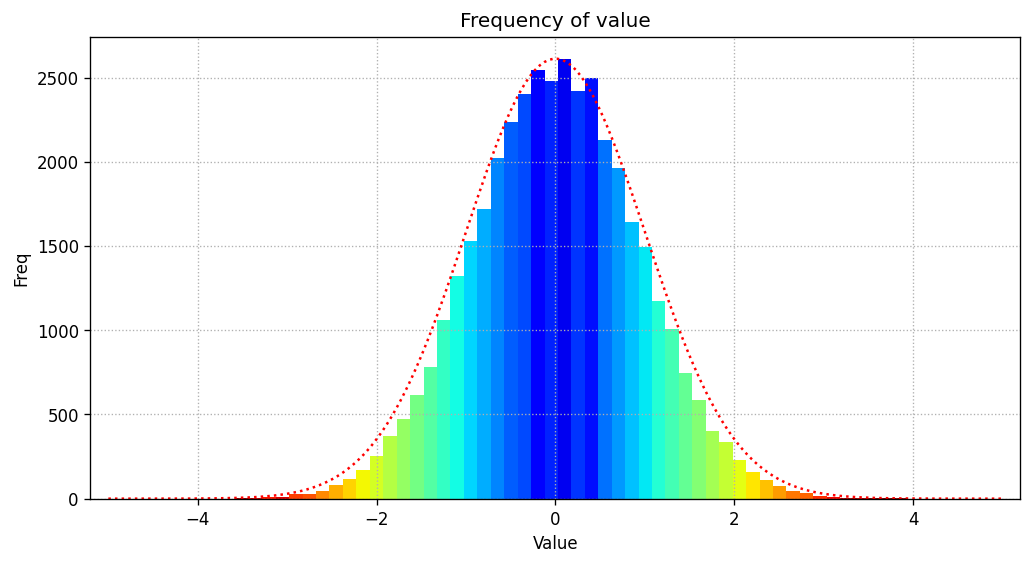

In [6]:
normal_dist_buckets(40000, 50)